In [1]:
import pandas as pd
data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
data2023 = data2023.drop('date', axis=1)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)
data2023['mode'] = data2023['mode'].replace(2, 1)

In [2]:
# 데이터와 라벨 결합
combined = pd.concat([data2023, label2023], axis=1)

# 복원추출 수행 (원본 데이터셋의 7배 크기)
resampled_combined = combined.sample(n=len(combined) * 10, replace=True, random_state=42)

# 데이터와 라벨 분리
data2023 = resampled_combined.iloc[:, :-label2023.shape[1]]
label2023 = resampled_combined.iloc[:, -label2023.shape[1]:]

print(data2023.shape)
print(label2023.shape)

(53000, 10)
(53000, 1)


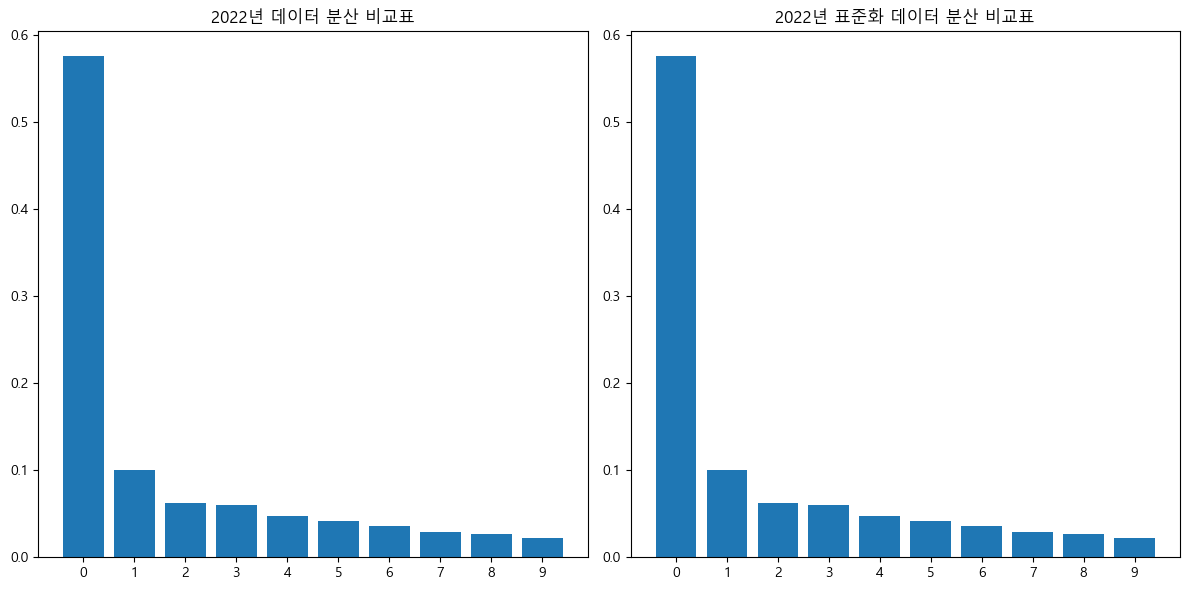

In [3]:
# lda 주요 성분 분산표
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 표준화
std = StandardScaler()
data2023_std = std.fit_transform(data2023)

# LDA 적용
lda = LinearDiscriminantAnalysis()

datasets = {
    '2022년 데이터 분산 비교표': (data2023, label2023),
    '2022년 표준화 데이터 분산 비교표': (data2023_std, label2023)
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (title, (dataset, labels)) in zip(axes.flatten(), datasets.items()):
    lda.fit(dataset, labels.values.reshape(-1))  # labels를 numpy 배열로 변환 후 reshape
    explained_variance_ratio = lda.explained_variance_ratio_
    x = np.arange(len(explained_variance_ratio))
    ax.bar(x, explained_variance_ratio)
    ax.set_xticks(x)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2023, label2023, test_size=0.3)

# LDA 적용
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# KNN 모델 적용
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))


c:\itbank\preject2\project\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 세트 정확도 :  0.695
검증 세트 정확도 :  0.676


In [7]:
from sklearn.preprocessing import StandardScaler
# 표준화 LDA 적용
lda = LDA(n_components=4)

std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# KNN 모델 적용
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

c:\itbank\preject2\project\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 세트 정확도 :  0.697
검증 세트 정확도 :  0.68


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

lda = LDA(n_components=4)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

model = KNeighborsRegressor()
# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='r2')
grid_search.fit(X_train_lda, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", grid_search.best_params_)
print("최적의 검증 점수: ", grid_search.best_score_)

c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


최적의 하이퍼파라미터:  {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
최적의 검증 점수:  0.7114705265739364


In [38]:
def getBestKNN(X_train, X_test):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors':[20,30,40],
        'weights': ['distance'],
        'metric': ['minkowski','euclidean','manhattan'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [30,40,50],
        'p': [1]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score : ', grid_search.best_estimator_.score(X_test, y_test))

    return grid_search.best_estimator_

In [39]:
getBestKNN(X_train_lda, X_test_lda)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 40, 'p': 1, 'weights': 'distance'}
Best score :  0.7189654439730965
Best estimator test score :  0.7195547831805102


KNeighborsRegressor(n_neighbors=40, p=1, weights='distance')

In [40]:
def getBestKNN(X_train, X_test):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors':[40,50,60,70,80,90,100],
        'weights': ['distance'],
        'metric': ['minkowski'],
        'algorithm': ['auto'],
        'leaf_size': [30],
        'p': [1]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score : ', grid_search.best_estimator_.score(X_test, y_test))

    return grid_search.best_estimator_

In [41]:
getBestKNN(X_train_lda, X_test_lda)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 100, 'p': 1, 'weights': 'distance'}
Best score :  0.7219263024107748
Best estimator test score :  0.7233336577466931


KNeighborsRegressor(n_neighbors=100, p=1, weights='distance')

In [43]:
def getBestKNN(X_train, X_test):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors':[100,110,120,130,140,150],
        'weights': [ 'distance'],
        'metric': ['minkowski'],
        'algorithm': ['auto'],
        'leaf_size': [30],
        'p': [1]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score : ', grid_search.best_estimator_.score(X_test, y_test))

    return grid_search.best_estimator_

In [44]:
getBestKNN(X_train_lda, X_test_lda)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 150, 'p': 1, 'weights': 'distance'}
Best score :  0.7226677868036905
Best estimator test score :  0.723761740673659


KNeighborsRegressor(n_neighbors=150, p=1, weights='distance')

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA 적용
lda = LDA(n_components=4)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# 하이퍼파라미터 그리드 설정
param_grid = {
        'n_neighbors':[150],
        'weights': [ 'distance'],
        'metric': ['minkowski'],
        'algorithm': ['auto'],
        'leaf_size': [30],
        'p': [1]
    }

# KNN 모델 생성
knn = KNeighborsRegressor()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2')

# 모델 훈련
grid_search.fit(X_train_lda, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_predicted = best_model.predict(X_test_lda)

# 학습 세트와 검증 세트 점수 출력
train_score = best_model.score(X_train_lda, y_train)
test_score = best_model.score(X_test_lda, y_test)

# 교차 검증 점수 계산
cross_val_scores = cross_val_score(best_model, X_train_lda, y_train, cv=5, scoring='r2')

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))
print('교차 검증 점수 : ', cross_val_scores)
print('교차 검증 평균 점수 : ', round(cross_val_scores.mean(), 3))

c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 세트 정확도 :  0.725
검증 세트 정확도 :  0.724
교차 검증 점수 :  [0.71748179 0.72675487 0.72238377 0.72609277 0.72132491]
교차 검증 평균 점수 :  0.723


### LDA 전처리 모델 저장
- 실제 데이터를 예측하기 위해서는 학습시킨 모델의 전처리 형식과 동일하게 해야하기 때문에 LDA 모델도 필요

In [ ]:
# LDA 전처리 모델 저장
import pickle
import os

if not os.path.exists('models'):
    os.makedirs('models')
filePath = 'models/' + '2023lda' + '.pkl'
pickle.dump(lda, open(filePath, 'wb'))
print('Model saved to', filePath)

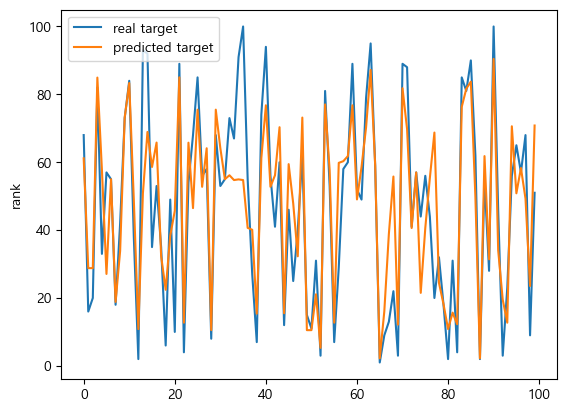

In [48]:
number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

        'n_neighbors':[150],
        'weights': [ 'distance'],
        'metric': ['minkowski'],
        'algorithm': ['auto'],
        'leaf_size': [30],
        'p': [1]

### KNN 모델 Fit 후 Pickle로 저장
- 기존 KNN 피클 파일은 Fit이 되지 않은 상태로 저장되어 있었음

In [8]:
# 모델 Fit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

knn = KNeighborsRegressor(n_neighbors=150, weights='distance', metric='minkowski', algorithm='auto', leaf_size=30, p=1)
knn.fit(X_train_lda, y_train)

KNeighborsRegressor(n_neighbors=150, p=1, weights='distance')

In [9]:
# 모델 저장
import pickle
import os

if not os.path.exists('models'):
    os.makedirs('models')
filePath = 'models/' + 'lda2023' + '.pkl'
pickle.dump(knn, open(filePath, 'wb'))
print('Model saved to', filePath)

Model saved to models/lda2023.pkl


Ridge 모델 학습 세트 정확도: 0.031
Ridge 모델 검증 세트 정확도: 0.03
Lasso 모델 학습 세트 정확도: 0.031
Lasso 모델 검증 세트 정확도: 0.03
ElasticNet 모델 학습 세트 정확도: 0.031
ElasticNet 모델 검증 세트 정확도: 0.03


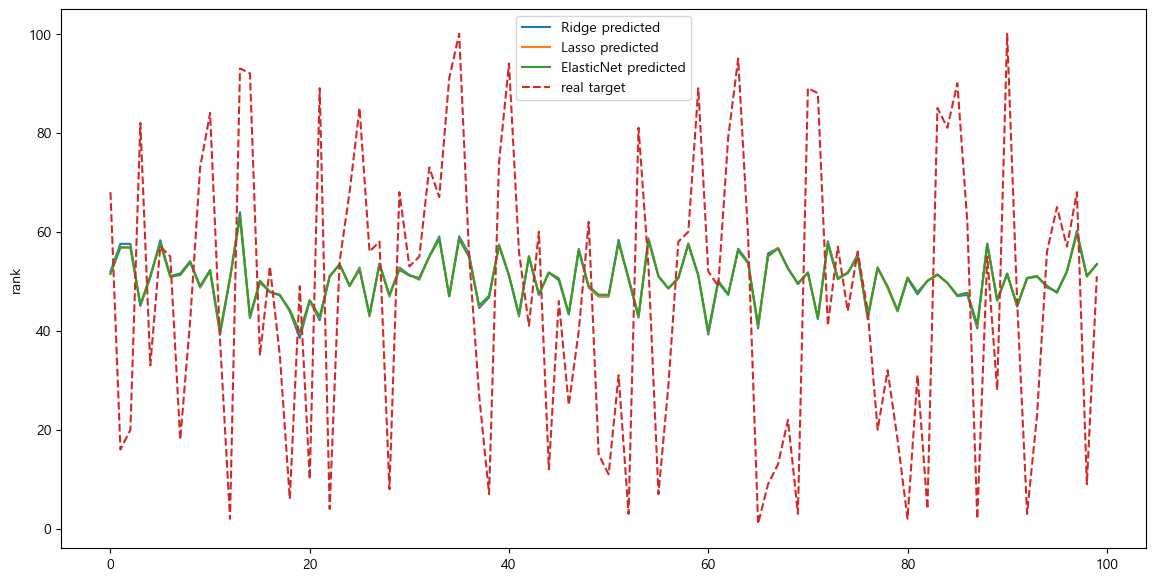

In [50]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 리스트
models = {
    'Ridge': Ridge(alpha=0.1),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio는 L1과 L2 비율을 조정합니다
}

# 결과 저장용 딕셔너리
results = {}

# 모델 학습 및 예측
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_predicted = model.predict(X_test_scaled)
    
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    results[name] = {
        'train_score': train_score,
        'test_score': test_score,
        'y_predicted': y_predicted
    }
    
    print(f'{name} 모델 학습 세트 정확도: {round(train_score, 3)}')
    print(f'{name} 모델 검증 세트 정확도: {round(test_score, 3)}')

# 예측 결과 시각화
number_of_sample = 100
plt.figure(figsize=(14, 7))

for name, result in results.items():
    plt.plot(range(number_of_sample), result['y_predicted'][:number_of_sample], label=f'{name} predicted')

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target', linestyle='--')
plt.ylabel('rank')
plt.legend()
plt.show()


In [ ]:
#이이이이잉

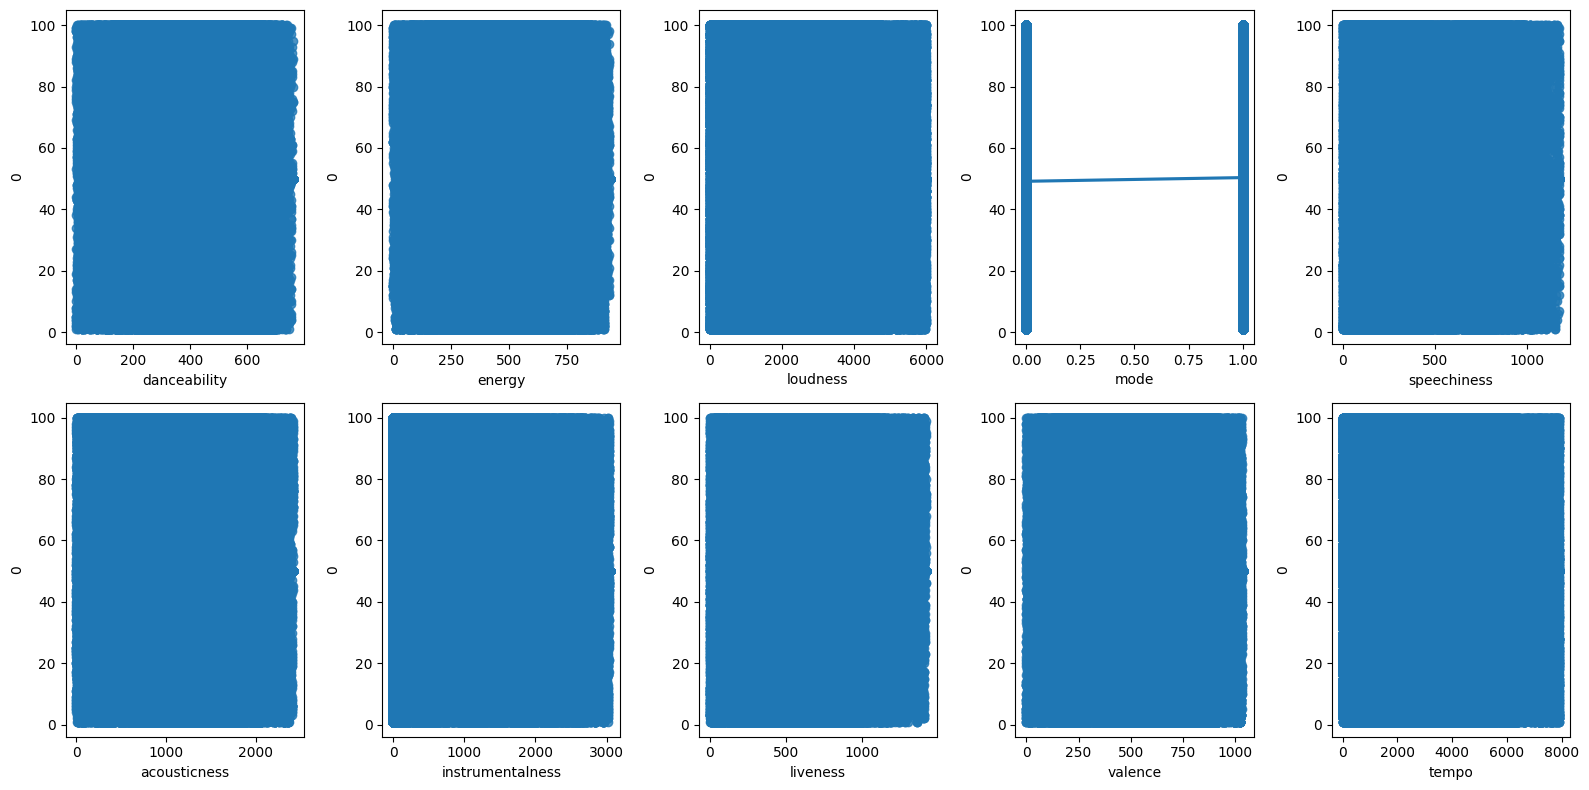

In [53]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # 데이터 병합
# df = pd.concat([data, label], axis=1)

# # 서브플롯 생성
# fig, axs = plt.subplots(figsize=(16, 8), ncols=5, nrows=2)
# features = data.columns

# # 각 feature에 대해 회귀선 그리기
# for i, feature in enumerate(features):
#     row = i // 5
#     col = i % 5
#     sns.regplot(x=feature, y=label.columns[0], data=df, ax=axs[row][col])

# plt.tight_layout()
# plt.show()
# # 각 feature과 label간의 상관관계가 없음.